In [5]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
iphone_reviews=[]

In [8]:
for i in range (1,31):
    ip=[]
    url ="https://www.amazon.in/Apple-iPhone-13-128GB-Blue/product-reviews/B09G9BL5CP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [9]:
iphone_reviews = list(set(iphone_reviews))

In [10]:
txt_upd = ' '.join(iphone_reviews)
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [11]:
text_tokens = word_tokenize(txt_upd)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tf = TfidfVectorizer()
text_tf = tf.fit_transform(tokens_without_sw)
feature_names = tf.get_feature_names_out()  # Use get_feature_names_out() to get feature names
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)


In [14]:
df

,absolutely,accuracy,adapter,add,address,addressed,adjusted,adopt,airplay,airtel,...,whatspp,wi,wide,working,works,world,worth,year,years,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


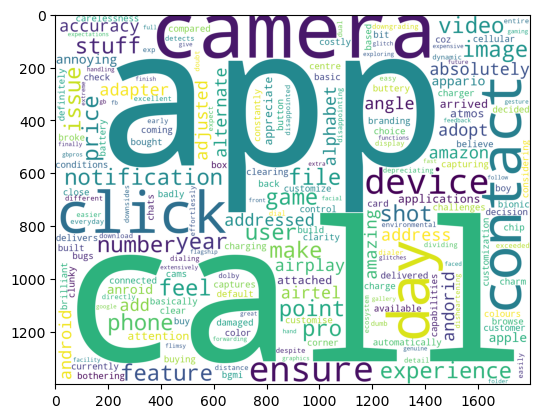

In [15]:
word_list = ' '.join(df)
wordcloud = WordCloud(background_color='white',width=1800,height=1400).generate(word_list)
plt.imshow(wordcloud)

In [19]:
#Sentimental Analysis
with open("C:\\Users\\deepa\\Downloads\\positive-words (1).txt","r") as pw :
    positive_words = pw.read().split("\n")

In [20]:
positive_words = positive_words[35:]

In [21]:
with open("C:\\Users\\deepa\\Downloads\\negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [22]:
negative_words = negative_words[35:]

In [23]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [24]:
wordcloud_neg = WordCloud(background_color='white',width=1800,height=1400).generate(txt_neg_in_nw)

In [25]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [26]:
wordcloud_pos = WordCloud(background_color='white',width=1800,height=140).generate(txt_pos_in_pw)

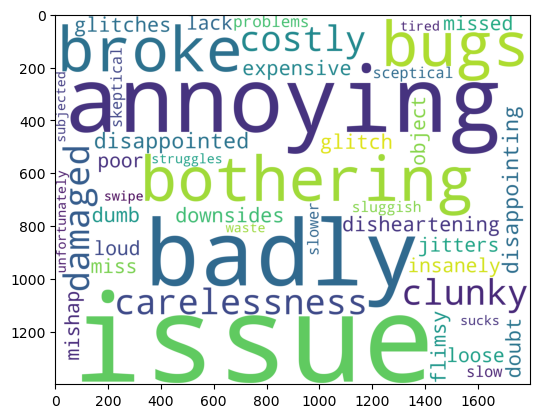

In [27]:
#Conclusion
plt.imshow(wordcloud_neg)

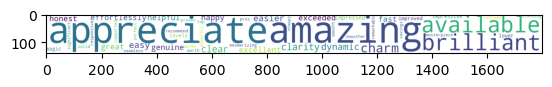

In [28]:
plt.imshow(wordcloud_pos)